# Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.lines as mlines
%matplotlib inline

# Transformando tumor "B" (benigno) em 0 e "M" (maligno) em 1

In [2]:

#encoding the y-label
def M_B_0_1(label):
    if label == 'M':
        return 1
    else:
        return 0


In [3]:
cancer_data = pd.read_csv('data.csv')
cancer_data['diagnosis'] = cancer_data['diagnosis'].apply(M_B_0_1)

# Padronização de dados 

Val - média(Val) / desvio_padrao(Val)

In [4]:

cols_normalizar = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [5]:
cancer_data[cols_normalizar] = cancer_data[cols_normalizar].apply(lambda x: (x - np.mean(x)) / (np.std(x)  ) )

# Separando features e resultados do dataset

x_data -> features dos tumores 


y_data -> resultados ( benigno e maligno)

In [6]:
labels_to_drop = ['id','diagnosis']
x_data = cancer_data.drop(labels=labels_to_drop,axis=1)
y_data = cancer_data['diagnosis']


# Fazendo o split do Dataset entre dataset de treino e de testes

X_train -> dataset de treino

y_train -> resultados do dataset de treino


X_test -> dataset de testes

y_test -> resultados do dataset de testes


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=101)

# Criando o classificador SVM e fazendo a classificação dos dados

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
y_pred = classifier.predict(X_test)

# Imprimindo valores e resultados

In [10]:
print(classification_report(y_test,y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       105
          1       0.98      0.95      0.97        66

avg / total       0.98      0.98      0.98       171



In [11]:
add_values = np.linspace(0,1,171)

In [12]:
y_values = y_pred + add_values

In [13]:
y_predt = y_pred + add_values

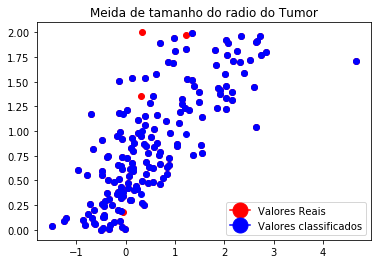

In [14]:
plt.title('Meida de tamanho do radio do Tumor')

pontos_azuis = mlines.Line2D([], [], color='red', marker='o',
                          markersize=15, label='Valores Reais')

pontos_vermelhos = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=15, label='Valores classificados')

plt.legend(handles=[pontos_azuis,pontos_vermelhos])

plt.plot(X_test['radius_mean'] + add_values, y_test +add_values, 'ro', 
         X_test['radius_mean'] + add_values, y_predt, 'bo')
plt.show()

In [15]:
index = list(range(len(X_test)))
X_test = X_test.assign(id = index)


# Separar tumores malignos e benignos de cada dataset


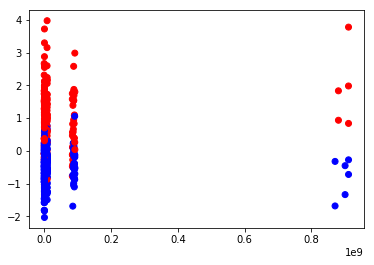

In [16]:
colors = {0:'b',1:'r'}
plt.scatter(cancer_data['id'],cancer_data['radius_mean'], c=cancer_data['diagnosis'].apply(lambda x: colors[x]))
plt.show()

# Printando malignos e benignos dos classificados

In [17]:
cores = lambda x: colors[x]

In [265]:
df = pd.DataFrame(data=y_test)


107    0
437    0
195    0
141    1
319    0
295    0
114    0
202    1
268    0
342    0
257    1
281    0
106    0
58     0
156    1
416    0
124    0
269    0
24     1
385    1
109    0
557    0
48     0
529    0
83     1
471    0
138    1
296    0
118    1
379    1
      ..
469    0
417    1
464    0
454    0
447    0
363    0
241    0
542    0
224    0
422    0
186    1
171    1
95     1
504    0
260    1
266    0
492    1
271    0
111    0
536    1
450    0
556    0
323    1
127    1
38     1
420    0
279    0
390    0
91     1
297    1
Name: diagnosis, Length: 171, dtype: int64

In [20]:
l

[107,
 437,
 195,
 141,
 319,
 295,
 114,
 202,
 268,
 342,
 257,
 281,
 106,
 58,
 156,
 416,
 124,
 269,
 24,
 385,
 109,
 557,
 48,
 529,
 83,
 471,
 138,
 296,
 118,
 379,
 81,
 8,
 466,
 261,
 287,
 354,
 274,
 39,
 233,
 18,
 201,
 187,
 334,
 513,
 174,
 55,
 72,
 225,
 194,
 350,
 516,
 455,
 377,
 567,
 188,
 325,
 32,
 302,
 355,
 429,
 117,
 255,
 367,
 304,
 256,
 228,
 200,
 0,
 4,
 361,
 282,
 308,
 179,
 189,
 161,
 272,
 384,
 213,
 2,
 291,
 496,
 560,
 290,
 98,
 267,
 173,
 31,
 293,
 460,
 489,
 147,
 100,
 64,
 204,
 104,
 412,
 278,
 128,
 62,
 12,
 237,
 546,
 502,
 314,
 409,
 488,
 485,
 438,
 434,
 19,
 313,
 139,
 495,
 317,
 476,
 130,
 246,
 205,
 16,
 218,
 212,
 33,
 533,
 310,
 89,
 60,
 288,
 320,
 508,
 544,
 181,
 30,
 157,
 331,
 442,
 216,
 372,
 65,
 56,
 116,
 468,
 469,
 417,
 464,
 454,
 447,
 363,
 241,
 542,
 224,
 422,
 186,
 171,
 95,
 504,
 260,
 266,
 492,
 271,
 111,
 536,
 450,
 556,
 323,
 127,
 38,
 420,
 279,
 390,
 91,
 297]

# Gráficos

-0.50193594287517262

In [172]:
a_indices = X_test.index.values

    

AttributeError: 'numpy.ndarray' object has no attribute 'index'

2


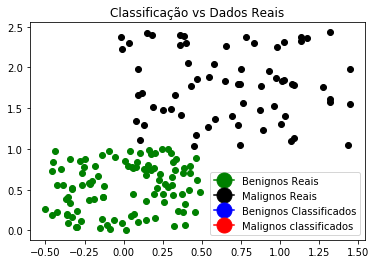

In [197]:
#Legendas

plt.title('Classificação vs Dados Reais')

pontos_verdes = mlines.Line2D([], [], color='green', marker='o',
                          markersize=15, label='Benignos Reais')

pontos_pretos = mlines.Line2D([], [], color='black', marker='o',
                          markersize=15, label='Malignos Reais')

pontos_azuis = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=15, label='Benignos Classificados')

pontos_vermelhos = mlines.Line2D([], [], color='red', marker='o',
                          markersize=15, label='Malignos classificados')

plt.legend(handles=[pontos_verdes,pontos_pretos,pontos_azuis,pontos_vermelhos])

#criar um space para adicionar aos beningnos e malignos e distanciar as amostras para plotagem
benignos_add_values = np.random.random([107])
spaco_add_values2 = np.random.random([107])

malignos_add_values = np.random.random([len(malignos_amostra)]) * 1.5
spaco_add_values_mal = np.random.random([len(malignos_amostra)]) * 1.5




# valores reais da amostra
benignos_amostra = []
malignos_amostra = []
print_x_test_f1_benignos_amostra = []


print_x_test_f1_malignos_amostra = []


for i in y_test:
    if(i == 0):
        benignos_amostra.append(i)
        print_x_test_f1_benignos_amostra.append(X_test['radius_mean'].values[i])
        
    else:
        malignos_amostra.append(i)
        print_x_test_f1_malignos_amostra.append(X_test['radius_mean'].values[i])
        

dif_benigos_amostra_classificados = len(benignos)-len(benignos_amostra)        
print (dif_benigos_amostra_classificados)
total_benignos = len(benignos_amostra) 


plt.plot(print_x_test_f1_benignos_amostra + benignos_add_values[:total_benignos],
         benignos_amostra + spaco_add_values2[:total_benignos],'go')
plt.plot(print_x_test_f1_malignos_amostra + malignos_add_values, malignos_amostra + spaco_add_values_mal, 'ko')            


# #Impressao dos valores classificados
# benignos = []
# malignos = []
# for i in y_pred:
#     if(i == 0):
#         benignos.append(i)        
#     else:
#         malignos.append(i)        
        
        
        
# print(len(print_x_test_f1_benignos))        

# plt.plot(print_x_test_f1_benignos_amostra + benignos_add_values,benignos + spaco_add_values2,'bo')
# plt.plot(print_x_test_f1_benignos_amostra + malignos_add_values[:64], malignos + spaco_add_values_mal[:64], 'ro')            

In [188]:
len(malignos)

64

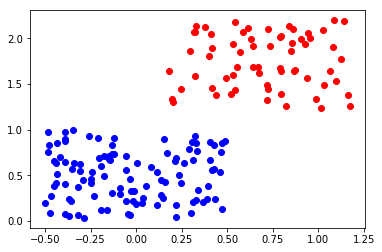

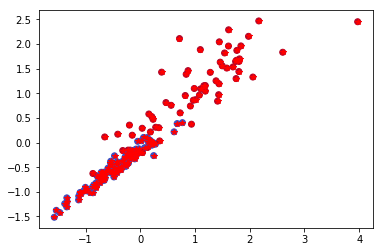

In [275]:

plt.scatter(X_test['radius_mean'], X_test['radius_worst'],c=y_pred ,cmap='coolwarm')
plt.plot(X_test['radius_mean'], X_test['radius_worst'], 'r*')

In [221]:
random_vals = np.random.rand(100)

In [237]:
spaco

array([ 2.        ,  2.01176471,  2.02352941,  2.03529412,  2.04705882,
        2.05882353,  2.07058824,  2.08235294,  2.09411765,  2.10588235,
        2.11764706,  2.12941176,  2.14117647,  2.15294118,  2.16470588,
        2.17647059,  2.18823529,  2.2       ,  2.21176471,  2.22352941,
        2.23529412,  2.24705882,  2.25882353,  2.27058824,  2.28235294,
        2.29411765,  2.30588235,  2.31764706,  2.32941176,  2.34117647,
        2.35294118,  2.36470588,  2.37647059,  2.38823529,  2.4       ,
        2.41176471,  2.42352941,  2.43529412,  2.44705882,  2.45882353,
        2.47058824,  2.48235294,  2.49411765,  2.50588235,  2.51764706,
        2.52941176,  2.54117647,  2.55294118,  2.56470588,  2.57647059,
        2.58823529,  2.6       ,  2.61176471,  2.62352941,  2.63529412,
        2.64705882,  2.65882353,  2.67058824,  2.68235294,  2.69411765,
        2.70588235,  2.71764706,  2.72941176,  2.74117647,  2.75294118,
        2.76470588,  2.77647059,  2.78823529,  2.8       ,  2.81

,diagnosis
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


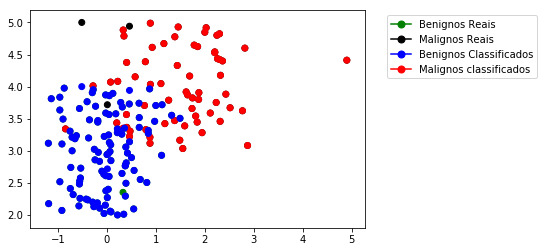

In [384]:

import matplotlib.patches as mpatches




pontos_verdes = mlines.Line2D([], [], color='green', marker='o',
                          markersize=7, label='Benignos Reais')

pontos_pretos = mlines.Line2D([], [], color='black', marker='o',
                          markersize=7, label='Malignos Reais')

pontos_azuis = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=7, label='Benignos Classificados')

pontos_vermelhos = mlines.Line2D([], [], color='red', marker='o',
                          markersize=7, label='Malignos classificados')



cores_val_reais = {0:'g',1:'k'}
cores_val_classificados={0:'b',1:'r'}


# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

random_vals = np.random.rand(len(y_test))
spaco = np.linspace(2,4,171)

df_y_test = pd.DataFrame(data=y_test)
df_y_pred = pd.DataFrame(data=y_pred, columns=['diagnosis'])


fig, ax = plt.subplots()

labels = ['Benignos Reais', 'Malignos Reais' ,'Benignos Classificados', 'Malignos classificados' ]

#fig.legend(handles=[pontos_verdes,pontos_pretos,pontos_azuis,pontos_vermelhos],labels=labels)

s = 121


x1 = X_test['radius_mean']  + random_vals
y1 = y_test + spaco

x2 = X_test['radius_mean']  + random_vals
y2 = y_pred + spaco


ax.scatter(x1, y1, color=df_y_test['diagnosis'].apply(lambda x: cores_val_reais[x]),  marker='o')

ax.scatter(x2, y2, color=df_y_pred['diagnosis'].apply(lambda x: cores_val_classificados[x]),  marker='o')



plt.legend(handles=[pontos_verdes,pontos_pretos,pontos_azuis,pontos_vermelhos] , bbox_to_anchor=(1.05, 1))



In [372]:
X_test.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'id'],
      dtype='object')

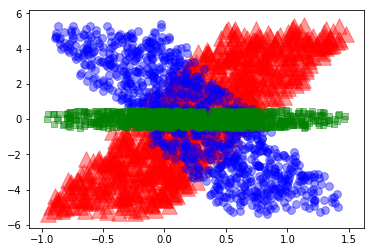

In [288]:
import matplotlib.pyplot as plt
import numpy as np

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

fig, ax = plt.subplots()
num = 1000
s = 121

x1 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y1 = np.linspace(-5,5,num) + (0.5 - np.random.rand(num))
x2 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y2 = np.linspace(5,-5,num) + (0.5 - np.random.rand(num))
x3 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y3 = (0.5 - np.random.rand(num))
ax.scatter(x1, y1, color='r', s=2*s, marker='^', alpha=.4)
ax.scatter(x2, y2, color='b', s=s/2, alpha=.4)
ax.scatter(x3, y3, color='g', s=s/3, marker='s', alpha=.4)



TypeError: 'module' object is not callable

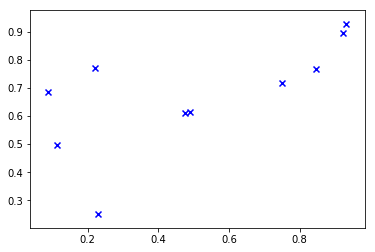

In [337]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.tools as tls

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api


colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(np.random.random(10), np.random.random(10), marker='x', color=colors[0])
ll = plt.scatter(np.random(10), np.random(10), marker='o', color=colors[0])
l  = plt.scatter(np.random(10), np.random(10), marker='o', color=colors[1])
a  = plt.scatter(np.random(10), np.random(10), marker='o', color=colors[2])
h  = plt.scatter(np.random(10), np.random(10), marker='o', color=colors[3])
hh = plt.scatter(np.random(10), np.random(10), marker='o', color=colors[4])
ho = plt.scatter(np.random(10), np.random(10), marker='x', color=colors[4])

text = iter(['Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'])


mpl_fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( mpl_fig )

for dat in plotly_fig['data']:
    t = text.next()
    dat.update({'name': t, 'text':t})

plotly_fig['layout']['showlegend'] = True
py.plot(plotly_fig)